[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13346\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13346\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13346\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\13346\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


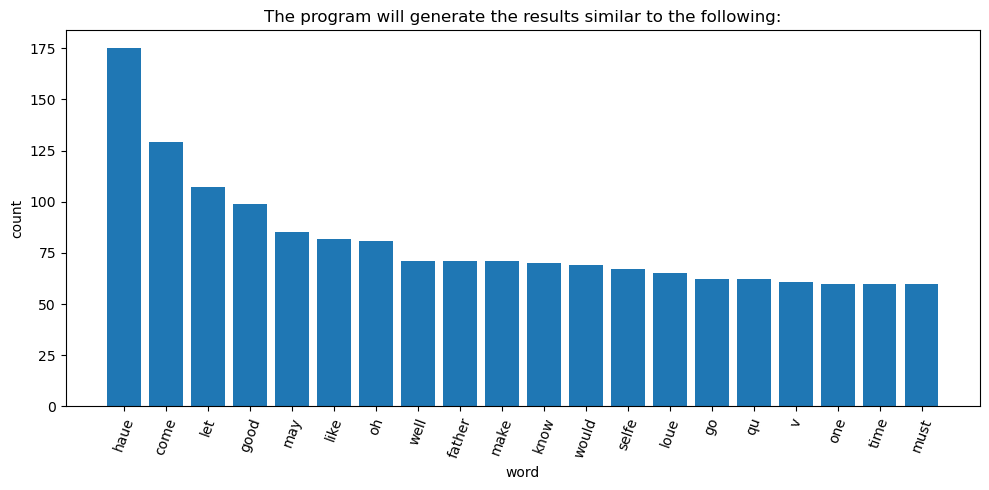

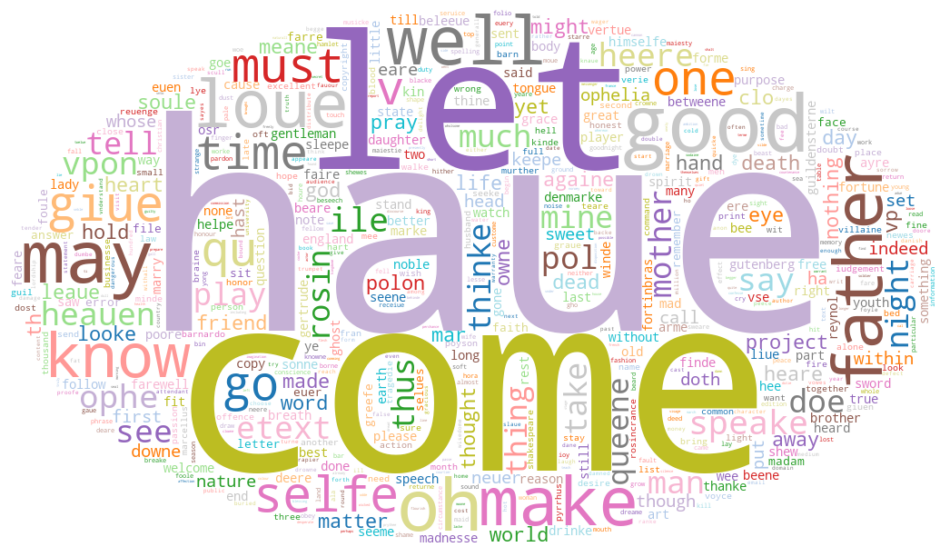

In [26]:
!pip install requests textblob wordcloud imageio matplotlib nltk
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

import requests 
from textblob import TextBlob 
import imageio.v3 as iio 
import matplotlib.pyplot as plt 
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud

#get the Text
target_url ='http://www.gutenberg.org/files/2265/2265.txt' 
response = requests.get(target_url, timeout=30) 
response.raise_for_status()
data = response.text
blob = TextBlob(data)

#Tokenize, clean, remove stopwords, and lemmatize
tokens = word_tokenize(data)
tokens = [t.lower() for t in tokens if t.isalpha()]
stop_words = set(stopwords.words('english'))

#filter common play artifacts and proper names
extra_stops = { 'thou','thee','thy','hath','shall','ay','nay','sir','enter','exeunt','exit', 'act','scene','hamlet','king','queen','lord','horatio','laertes','polonius', 'rosencrantz','guildenstern','ham','hor','laer','ros','guild' } 
stop_words |= extra_stops
tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
lemmatizer = WordNetLemmatizer() 
tokens = [lemmatizer.lemmatize(w) for w in tokens]

#Frequency counts and top-N list
freqs = Counter(tokens)
top_n = 20
top_words = freqs.most_common(top_n)

#Bar chart
words, counts = zip(*top_words) if top_words else ([], [])
plt.figure(figsize=(10, 5))
plt.bar(range(len(words)), counts, color="#1f77b4")
plt.xticks(range(len(words)), words, rotation=70) 
plt.title('The program will generate the results similar to the following:') 
plt.xlabel('word') 
plt.ylabel('count') 
plt.tight_layout()
plt.show()

#Word cloud
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png" 
mask_image = iio.imread(image_file)
text_for_wc = " ".join(tokens)
wc = WordCloud( background_color="white", max_words=600, mask=mask_image, width=1600, height=900, collocations=False, colormap="tab20" ).generate(text_for_wc)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()